- 금융이론들이 현실을 제대로 반영하는지 확인하기 위한 분석의 두 가정은 정규분포 수익률과 선형관계이다.
  - 정규분포는 1차 모멘트(기댓값)과 2차 모멘트(표준편차)만으로 분포를 정확히 묘사한다고 가정한다.
  - 1차 모멘트(기댓값)과 2차 모멘트(표준편차)는 정규분포만 정확하게 표현할 수 있다.

1차 모멘트: -0.0
2차 모멘트: 1.0


(array([  2.,  12.,  20.,  41.,  34.,  94., 133., 167., 225., 324., 437.,
        502., 646., 726., 737., 790., 799., 764., 694., 666., 573., 446.,
        360., 274., 189., 135.,  74.,  44.,  38.,  27.,  10.,   8.,   3.,
          3.,   3.]),
 array([-3.28057565, -3.07734044, -2.87410522, -2.67087   , -2.46763478,
        -2.26439957, -2.06116435, -1.85792913, -1.65469391, -1.4514587 ,
        -1.24822348, -1.04498826, -0.84175304, -0.63851782, -0.43528261,
        -0.23204739, -0.02881217,  0.17442305,  0.37765826,  0.58089348,
         0.7841287 ,  0.98736392,  1.19059913,  1.39383435,  1.59706957,
         1.80030479,  2.00354   ,  2.20677522,  2.41001044,  2.61324566,
         2.81648087,  3.01971609,  3.22295131,  3.42618653,  3.62942174,
         3.83265696]),
 <BarContainer object of 35 artists>)

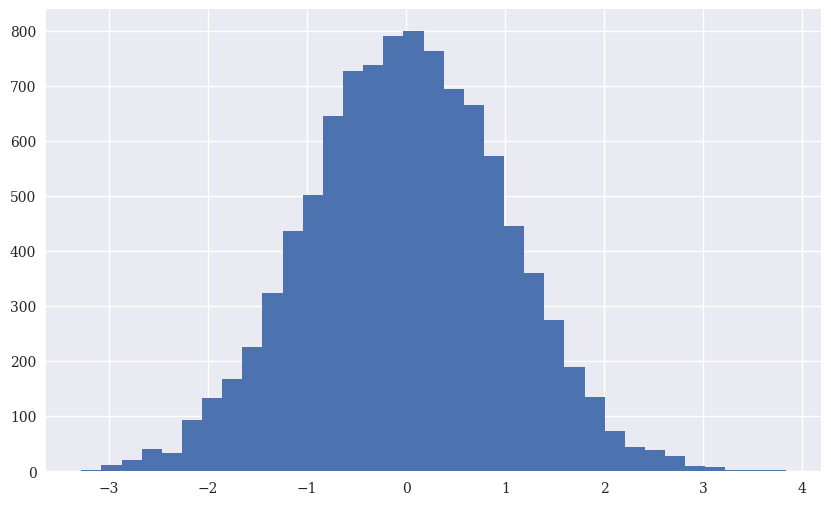

In [1]:
""" 표준 정규분포 숫자를 생성. 전형적인 종 모양의 히스토그램을 보여준다. """

import numpy as np
import pandas as pd
from pylab import plt, mpl

np.random.seed(100)
plt.style.use("seaborn-v0_8")
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["font.family"] = "serif"

N = 10000
# 표준 정규분포 숫자 생성
snrn = np.random.standard_normal(N)
snrn -= snrn.mean()
snrn /= snrn.std()

print("1차 모멘트:",round(snrn.mean(),4))
print("2차 모멘트:",round(snrn.std(),4))

plt.figure(figsize=(10,6))
plt.hist(snrn, bins=35)

1차 모멘트: 1.0
2차 모멘트: 1.0


(array([5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 2500.]),
 array([-0.85518611, -0.785375  , -0.71556389, -0.64575278, -0.57594167,
        -0.50613056, -0.43631944, -0.36650833, -0.29669722, -0.22688611,
        -0.157075  , -0.08726389, -0.01745278,  0.05235833,  0.12216944,
         0.19198056,  0.26179167,  0.33160278,  0.40141389,  0.471225  ,
         0.54103611,  0.61084722,  0.68065833,  0.75046944,  0.82028055,
         0.89009167,  0.95990278,  1.02971389,  1.099525  ,  1.16933611,
         1.23914722,  1.30895833,  1.37876944,  1.44858055,  1.51839167,
         1.58820278]),
 <BarContainer object of 35 artists>)

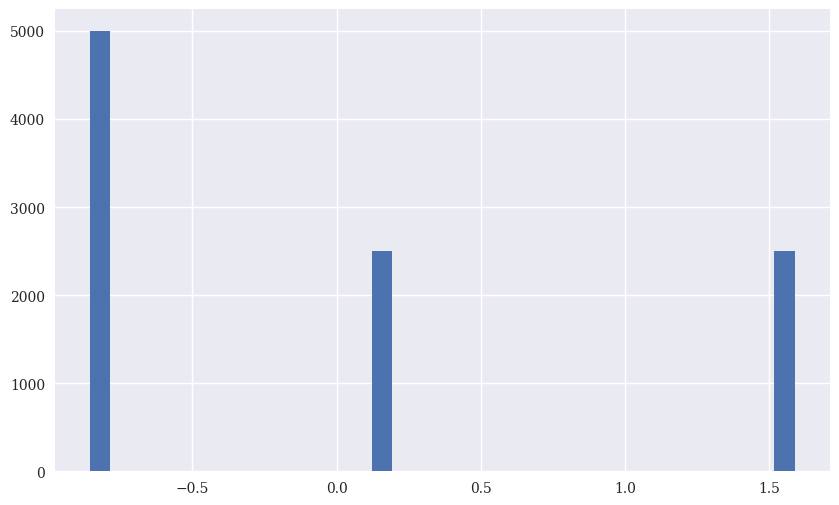

In [2]:
""" 동일한 1차 및 2차 모멘트값을 갖지만, 3가지 숫자만으로 구성된 분포 """

# 3값으로 된 무작위 숫자 생성
numbers = np.ones(N) * 1.5 
split = int(0.25 * N)
numbers[split:3 * split] = -1
numbers[3 * split: 4 * split] = 0

# 배열의 평균을 뺴서 평균을 0으로 맞춤
numbers -= numbers.mean()
# 표준편차로 나누어 분포를 표준화
numbers /= numbers.std()

# 1차 모멘트 (평균)
print("1차 모멘트:",round(numbers.std(),4))

# 2차 모멘트 (표준편차)
print("2차 모멘트:",round(numbers.std(), 4))

plt.figure(figsize=(10,6))
plt.hist(numbers, bins=35)

- 데이터와 정규분포를 비교하는 또 다른 방법은 Quantile-Quntile 플롯이다.
  - 정규분포를 이루는 숫자의 경우에는 Q-Q 플롯상에서 직선을 이룬다.

In [3]:
import math


- 마지막으로 통계적 검정(statistical test)을 통해 데이터가 정규분포인지 아닌지 확인할 수 있다.
  - Skew 검정
  - Kurtosis 검정
  - Skew 와 Kurtosis의 동시 검정
  - 검정의 유의확률이 0.05보다 작으면 정규분포라는 가정을 기각한다.

In [4]:
## TODO

##### 선형관계
- 자본자산 가격결정 모형에서 주식의 베타와 기대(혹은 실현)수익률 간의 선형관계 가정에 대해 고려해 보자.

In [5]:
# 역사적 일간 데이터를 가져온다
url = "http://hilpisch.com/aiif_eikon_eod_data.csv" 
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()

# 시장의 로그 수익률 계산
rets = np.log(raw / raw.shift(1)).dropna() 

- 기술주에 대한 베타 계산법, 자본자산 가격결정 모형으로 계산한 기대 수익률, 실현 수익률을 계산

In [11]:
r = 0.005
market = ".SPX"
res = pd.DataFrame()
for sym in rets.columns[:4]:
    for year in range(2010,2019):
        rets_ = rets.loc[f'{year}-01-01':f'{year}-12-31']
        muM = rets_[market].mean() * 252
        # beta 를 구한다.
        cov = rets_.cov().loc[sym, market]
        var = rets_[market].var()
        beta = cov /var 
        
        # 전년도의 베타로 예측치를 구한다
        rets_ = rets.loc[f'{year+1}-01-01':f'{year+1}-12-31']
        muM = rets_[market].mean() * 252
        mu_capm = r + beta * (muM - r)
        
        # 실제값
        mu_real = rets_[sym].mean() * 252
        res = pd.concat([res, pd.DataFrame({'symbol': [sym],
                            'beta': [beta],
                            'mu_capm': [mu_capm],
                            'mu_real': [mu_real]},
                           index=[year+1])])


- 베타를 독립변수로 놓고 자본자산 가격결정모형으로 구한 기대 수익률을 종속변수로 하는 선형 회귀분석의 결정계스 R**2 값을 계산하자
  - 결정계수 R**2 값은 모형이 얼마나 잘 예측을 수행하는지 측정하는 값이다.
- 그래프에서 확인할 수 있듯이 선형 회귀분석은 CAPM으로 구한 기대 수익률 변화의 10% 정도밖에 설명하지 못한다.
  - 실현 수익률의 경우에는 선형 회귀분석의 설명력이 더 낮아져 4.5% 정도밖에 되지 않는다. 
  - 선형 회귀분석에서는 회귀분석 직선이 양의 기울기를 나타내는 것이 보듯, 베타와 주식 수익률은 양의 비례관계라는 것을 보여준다.
    - 하지만 주식 수익률의 변동분 중 극히 일부밖에는 설명하지 못한다.

0.09272355783573527


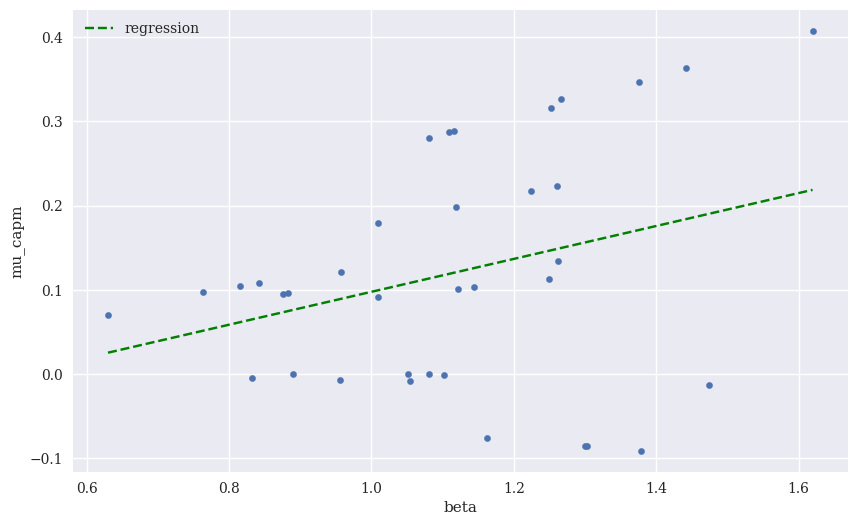

In [18]:
from sklearn.metrics import r2_score
# 최소제곱법(OLS, Ordinary Least Squares)을 사용해 x와 y 간의 1차(선형) 회귀 모델을 생성하는 함수
reg = np.polyfit(res['beta'], res['mu_capm'], deg=1) 
# 주어진 회귀 모델(reg)을 사용해 x값에 대해 예측값을 계산
res['mu_capm_ols'] = np.polyval(reg, res['beta'])
# 결정 계수(R**2) 계산
print(r2_score(res['mu_capm'], res['mu_capm_ols']))
# 베타와 CAPM으로 구한 기대 수익률의 선형관계
res.plot(kind='scatter', x='beta', y='mu_capm', figsize=(10,6))
x = np.linspace(res['beta'].min(), res['beta'].max())
plt.plot(x, np.polyval(reg,x), 'g--', label='regression')
plt.legend()

0.04466919444752937


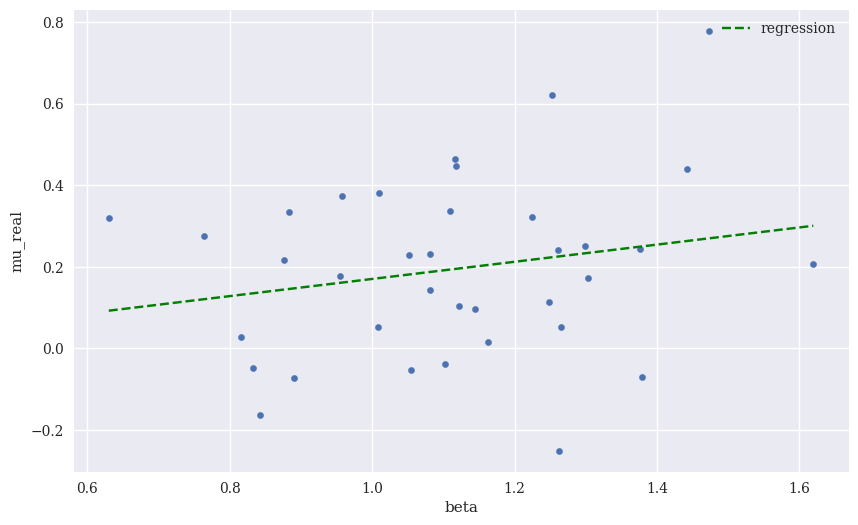

In [23]:
reg = np.polyfit(res['beta'], res['mu_real'], deg=1)
res['mu_real_ols'] = np.polyval(reg, res['beta'])
print(r2_score(res['mu_real'], res['mu_real_ols']))
res.plot(kind='scatter', x='beta', y='mu_real', figsize=(10,6))
x = np.linspace(res['beta'].min(), res['beta'].max())
plt.plot(x, np.polyval(reg,x),'g--',label='regression')
plt.legend()